In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [ ]:
df_Numeric = pd.read_excel(r"mergeHome_Numeric.xlsx")
df_Numeric.drop("Unnamed: 0", axis = 1, inplace = True)

# Bagımlı Degisken -> Fiyat
# Bagımsız Degisken ayrımı -> Fiyaat dşındaki özellikler

X = df_Numeric.drop(["Fiyat"], axis = 1)
y = df_Numeric["Fiyat"]


Train and Test Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, random_state=42)

Model Traning

In [30]:
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=3,
                          n_estimators=600)

Metrics

Training score:  0.7159646611950126
MSE: 33340149.21
RMSE: 5774.09
R2:  0.6329507291365148
MAE:  4131.199215972948
MAPE:  4131.199215972948


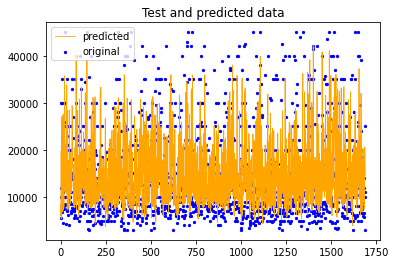

In [33]:
score = gbr.score(X_train, y_train)  
print("Training score: ", score)

y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: ", mae)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="orange", label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

One Home

In [32]:
new_data = [[2],[61],[50],[10],[15],[5],[0],[31]]


new_data = pd.DataFrame(new_data).T

df_new = new_data.rename(columns={
     0: "Oda_Sayisi",
     1: "Brut",
     2: "Net",
     3: "Bulundugu_Kat",
     4: "Bina_Yas",
     5: "Isitma_Tipi",
     6: "Esya_Durumu",
     7: "Ilce"})

pred = gbr.predict(df_new)
pred

#7500

array([9544.04090822])